# Lab7.2 Basic Visualization Tools

## Khám phá tập dữ liệu với *pandas* và Matplotlib<a id="0"></a>

### Download và chuẩn bị dữ liệu <a id="2"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

1. Dọn dẹp tập dữ liệu để loại bỏ các cột không cung cấp thông tin cho trực quan hóa (ví dụ: Type, AREA, REG).

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


2. Đổi tên một số cột sao cho phù hợp.

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


3. Để thống nhất, hãy đảm bảo tất cả các nhãn cột đều thuộc kiểu string.

In [7]:
all(isinstance(column, str) for column in df_can.columns)

False

In [8]:
df_can.columns = list(map(str, df_can.columns))

# giờ hãy kiểm tra các kiểu của nhãn cột
all(isinstance(column, str) for column in df_can.columns)

True

4. Đặt tên quốc gia làm chỉ mục - phương thức .loc hữu ích khi tra cứu nhanh các quốc gia.

In [9]:
df_can.set_index('Country', inplace=True)

# hãy xem 5 phần tử đầu tiên và cách dataframe thay đổi ra sao
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can.index.name = None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


5. Thêm cột Total.

In [11]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

/Users/ngothai/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
years = list(map(str, range(1980, 2014)))

## Trực quan hóa dữ liệu bằng Matplotlib<a id="4"></a>

In [13]:
import matplotlib as mpl
mpl.style.use('ggplot')

### Biểu đồ vùng<a id="6"></a>


In [14]:
# Sort total column in ascending orde
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [15]:
df_top5 = df_top5[years].transpose()
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Theo mặc định, biểu đồ vùng được xếp chồng lên nhau. Và để tạo ra một biểu đồ vùng xếp chồng, mỗi cột phải có tất cả các giá trị dương hoặc tất cả các giá trị âm (mọi giá trị NaN sẽ được đặt mặc định là 0). Để tạo ra một biểu đồ không xếp chồng, hãy nhập stacked=False.

In [16]:
# Convert index of df_top5 to int type
df_top5.index = list(map(int, df_top5.index))

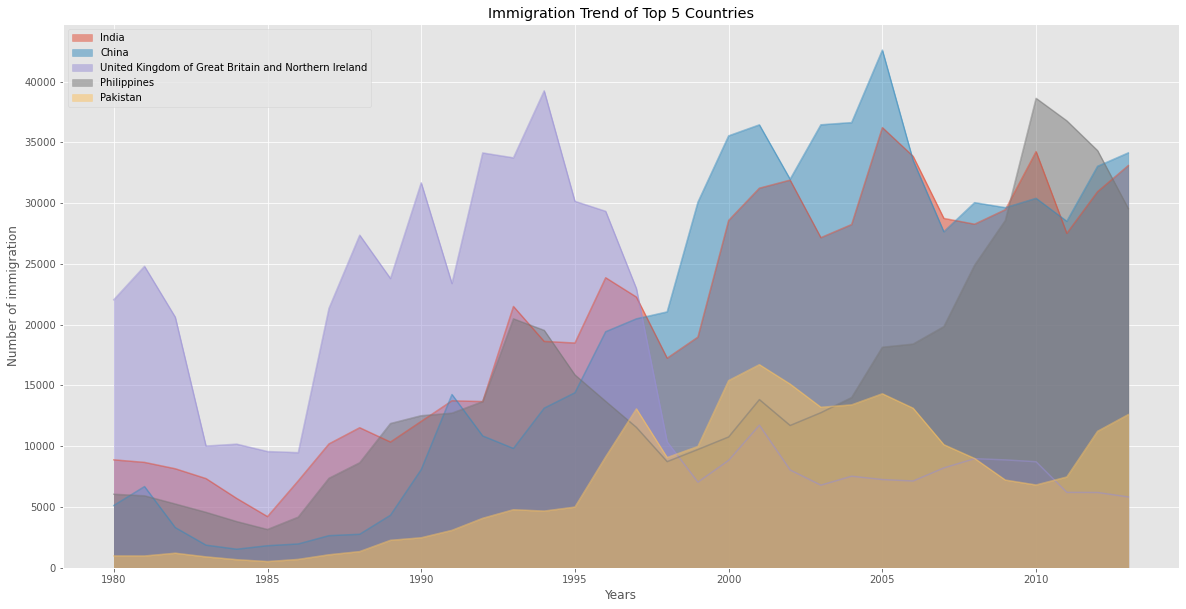

In [17]:
# Draw area plot for df_top5
df_top5.plot(kind='area',stacked=False, figsize=(20, 10))
# Set title for plot
plt.title('Immigration Trend of Top 5 Countries')
# Set xlabel for plot
plt.xlabel('Years')
# Set ylabel for plot
plt.ylabel('Number of immigration')

plt.show()

**Hai loại biểu đồ**

Như chúng ta đã thảo luận trong các bài giảng video, có hai loại / lựa chọn vẽ biểu đồ với `matplotlib`. Vẽ biểu đồ bằng lớp Artist và lớp scripting.

**Lựa chọn 1: Lớp Scripting (Phương thức cấu trúc) - sử dụng matplotlib.pyplot as 'plt'**

Bạn có thể sử dụng `plt`, chẳng hạn: `matplotlib.pyplot` và thêm nhiều phần tử hơn bằng cách gọi các phương thức khác nhau theo cấu trúc, ví dụ, `plt.title(...)` để thêm tiêu đề hoặc `plt.xlabel(...)` để thêm nhãn vào trục x.

```python
    # Tùy chọn 1: Đây là thứ chúng ta vẫn đang sử dụng
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Lựa chọn 2: Lớp Artist (Phương thức hướng đối tượng) - Sử dụng một `Axes` từ Matplotlib (ưu tiên)**

Bạn có thể sử dụng `Axes` của biểu đồ hiện có và lưu nó trong một biến (ví dụ: `ax`). Bạn có thể thêm nhiều phần tử hơn bằng cách gọi các phương thức với một chút thay đổi về cú pháp (bằng cách thêm "_set_" vào các phương thức trước đó). Ví dụ: sử dụng `ax.set_title()` thay vì `plt.title()` để thêm tiêu đề hoặc `ax.set_xlabel()` thay vì `plt.xlabel()` để thêm nhãn vào trục x.

Tùy chọn này đôi khi minh bạch và linh hoạt hơn khi sử dụng cho các biểu đồ nâng cao (đặc biệt khi có nhiều biểu đồ, như bạn sẽ thấy ở phần sau).

Trong khóa học này, chúng ta sẽ chỉ sử dụng **lớp scripting**, ngoại trừ một số hình ảnh trực quan nâng cao cần sử dụng **lớp artist** khi xử lý các khía cạnh nâng cao của các biểu đồ.


Text(0.5, 0, 'Years')

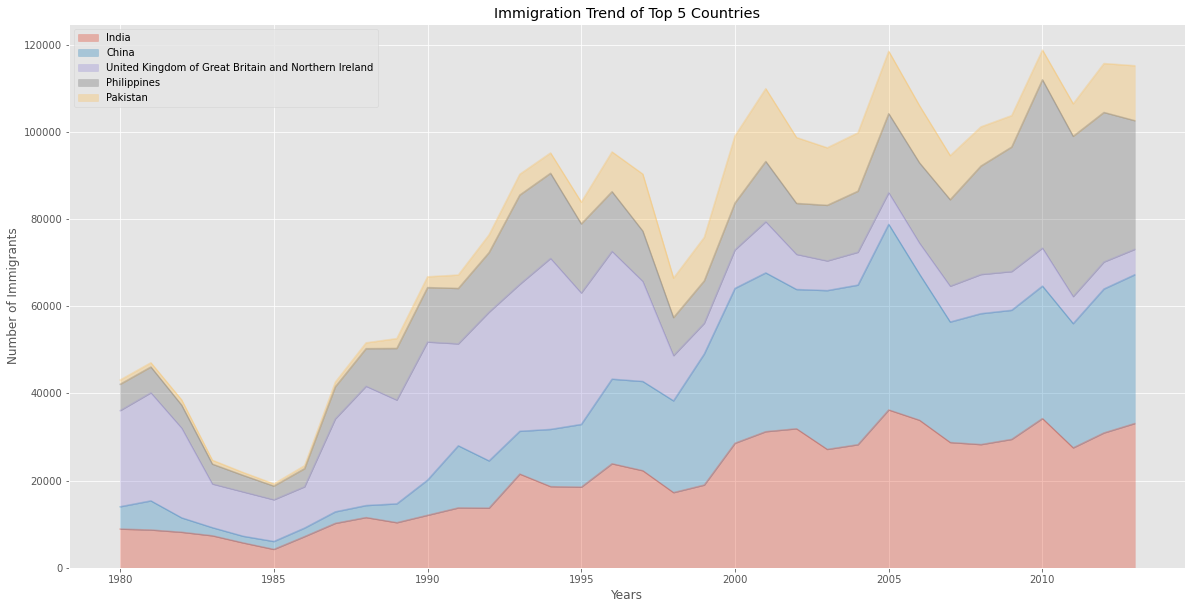

In [18]:
# Tùy chọn 2: tùy chọn ưu tiên có tính linh hoạt hơn
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Câu hỏi: Sử dụng lớp scripting để tạo biểu đồ vùng xếp chồng của 5 quốc gia có ít người nhập cư vào Canada nhất từ 1980 đến 2013. Sử dụng giá trị transparency là 0,45.

In [19]:
# Sort total column
df_least = df_can.tail(5)
df_least = df_least[years].transpose()
df_least


,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0
1986,1,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,0


In [20]:
# Convert df_least index to int
df_least.index = df_least.index.map(int)

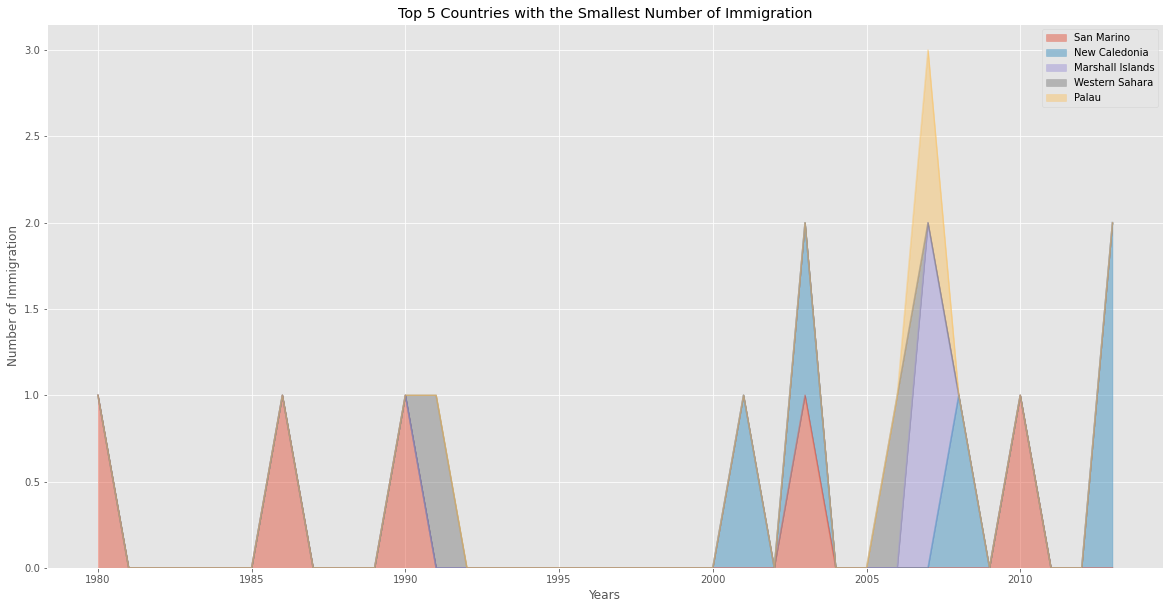

In [21]:
df_least.plot(kind='area', alpha=0.45, figsize=(20, 10))
plt.title('Top 5 Countries with the Smallest Number of Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.show()

Câu hỏi: Sử dụng lớp artist để tạo biểu đồ vùng không xếp chồng của 5 quốc gia có số người nhập cư vào Canada ít nhất từ 1980 đến 2013. Sử dụng giá trị transparency là 0,55.

Text(0, 0.5, 'Number of immigraition')

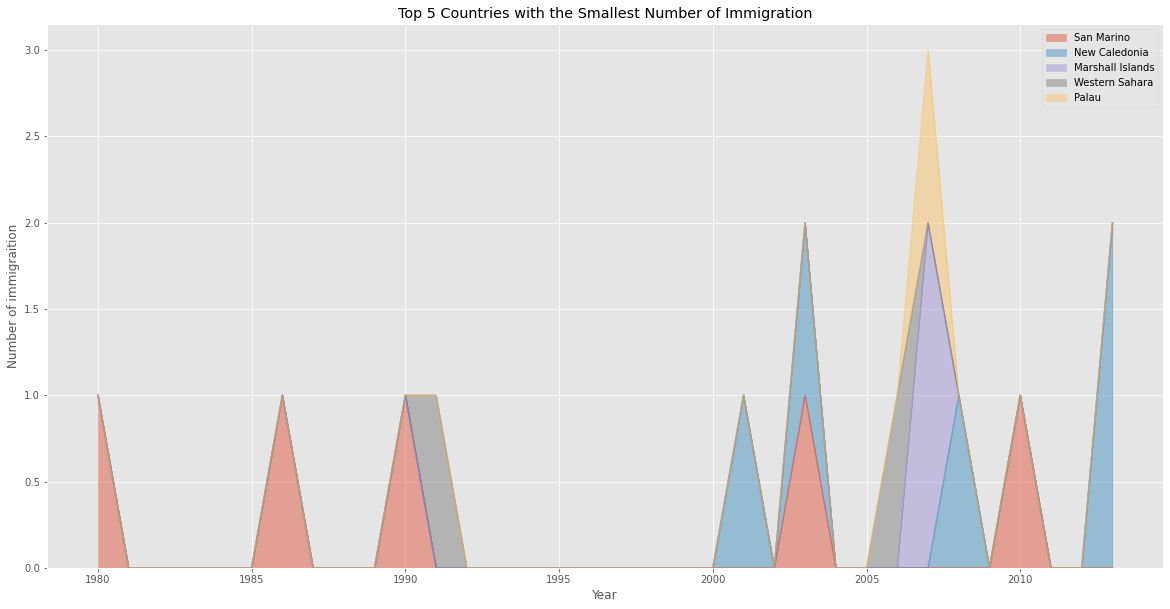

In [22]:
ax = df_least.plot(kind='area', alpha=0.45, figsize=(20,10))
ax.set_title('Top 5 Countries with the Smallest Number of Immigration')
ax.set_xlabel('Year')
ax.set_ylabel('Number of immigraition')


### Biểu đồ tần suất<a id="8"></a>


Biểu đồ tần suất là một cách biểu diễn phân phối _tần suất_ của tập dữ liệu số. Nó hoạt động bằng cách phân vùng trục x thành _bin_, gán mỗi điểm dữ liệu trong tập dữ liệu vào một bin, sau đó đếm số điểm dữ liệu đã được gán cho mỗi bin. Vì vậy, trục y là tần số hoặc số điểm dữ liệu trong mỗi bin. Lưu ý rằng chúng ta có thể thay đổi kích thước bin và thường thì cần phải tinh chỉnh nó để phân phối được hiển thị đẹp mắt.

**Câu hỏi:** Phân bố tần suất số lượng (dân số) của những người nhập cư mới từ các quốc gia khác nhau đến Canada trong năm 2013 là bao nhiêu?

Trước khi tiến hành tạo biểu đồ biểu đồ, trước tiên chúng ta hãy kiểm tra dữ liệu được chia thành các khoảng thời gian. Chúng ta thực hiện điều này bằng phương thức `histogram` của **Numpy** để lấy các phạm vi bin và lượng tần suất như sau:

In [23]:
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [24]:
count, bin_edges = np.histogram(df_can['2013'])
print(count) # Lượng tần suất
print(bin_edges) # Các khoảng bin, mặc định  = 10 bin

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Theo mặc định, phương thức `histogram` chia nhỏ tập dữ liệu thành 10 bin. Hình dưới đây tóm tắt các phạm vi bin và phân bố tần suất nhập cư trong năm 2013. Chúng ta có thể thấy rằng trong năm 2013:

-   178 quốc gia có từ 0 đến 3412,9 người nhập cư
-   11 quốc gia có từ 3412,9 đến 6825,8 người nhập cư
-   1 quốc gia có từ 6285,8 đến 10238,7 người nhập cư,...

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>


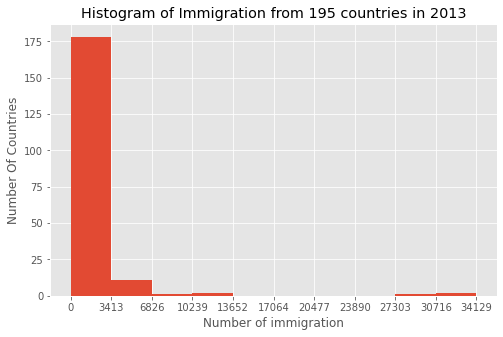

In [25]:
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number Of Countries')
plt.xlabel('Number of immigration')
plt.show()

Câu hỏi: Sự phân bố nhập cư của Đan Mạch, Na Uy và Thụy Điển trong những năm 1980 - 2013 là bao nhiêu?

In [26]:
df_DNS = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

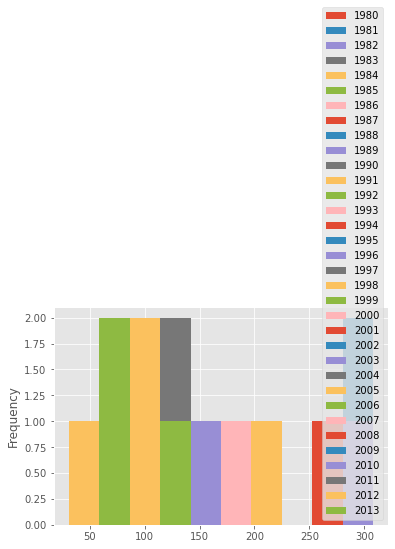

In [27]:
df_DNS.plot.hist()

In [28]:
df_DNS = df_DNS.transpose()
df_DNS.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


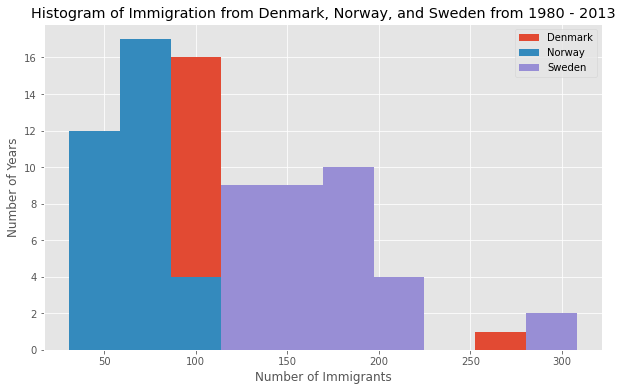

In [29]:
df_DNS.plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hãy thực hiện một số sửa đổi để cải thiện tác động và tính thẩm mỹ của biểu đồ trước đó:

-   tăng kích thước bin lên 15 bằng cách truyền vào tham số `bin`
-   đặt transparency thành 60% bằng cách truyền vào tham số `alpha`
-   gắn nhãn trục x bằng cách truyền vào tham số `x-label`
-   thay đổi màu sắc của các biểu đồ bằng cách truyền vào tham số `color`

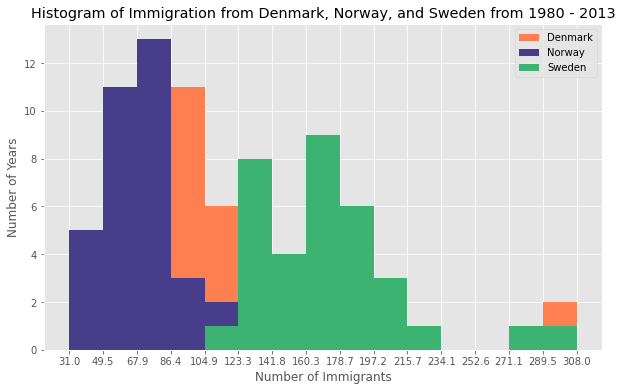

In [30]:
count, bin_edges = np.histogram(df_DNS, 15)
df_DNS.plot(kind='hist', 
            figsize=(10,6), 
            bins=15, 
            xticks = bin_edges, 
            color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Câu hỏi: Hãy sử dụng lớp scripting để hiển thị phân bố nhập cư của Hy Lạp, Albania và Bulgaria trong những năm 1980 - 2013. Sử dụng biểu đồ xếp chồng có 15 bin và giá trị transparency là 0,35.

In [31]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof_t = df_cof.transpose()
df_cof_t.head()

,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


In [32]:
count, bin_edge = np.histogram(df_cof_t, 15)
bin_edge

array([   0. ,  134.8,  269.6,  404.4,  539.2,  674. ,  808.8,  943.6,
       1078.4, 1213.2, 1348. , 1482.8, 1617.6, 1752.4, 1887.2, 2022. ])

In [33]:
df_cof_t.index = list(map(int, df_cof_t.index))

In [34]:
df_cof_t.head()

,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


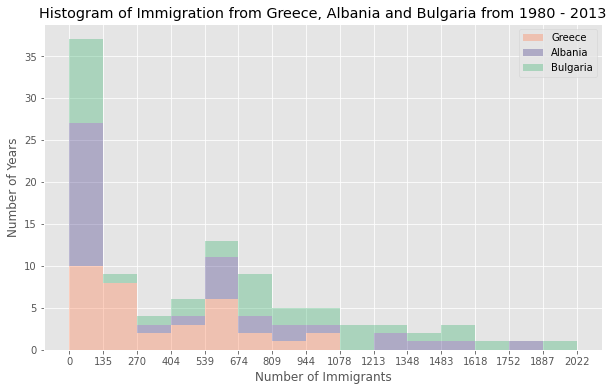

In [35]:
df_cof_t.plot(kind='hist',
                figsize=(10,6),
                bins=15, 
                xticks=bin_edge, stacked=True, alpha=0.35,
                color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### **Biểu đồ cột đứng**

Trong biểu đồ cột đứng, trục x được sử dụng để ghi nhãn và chiều dài của các cột trên trục y tương ứng với độ lớn của biến được đo. Biểu đồ cột đứng đặc biệt hữu ích trong việc phân tích dữ liệu chuỗi thời gian. Một điểm bất lợi là chúng thiếu không gian để gắn nhãn văn bản dưới chân mỗi cột.

**Hãy bắt đầu bằng cách phân tích tác động của Khủng hoảng tài chính ở Iceland:**

Khủng hoảng tài chính Iceland 2008 - 2011 là một sự kiện kinh tế và chính trị lớn ở Iceland. Liên quan tới quy mô nền kinh tế, sự sụp đổ hệ thống ngân hàng của Iceland là sự cố lớn nhất mà bất kỳ quốc gia nào trong lịch sử kinh tế phải trải qua. Cuộc khủng hoảng đã dẫn đến suy thoái kinh tế nghiêm trọng trong năm 2008 - 2011 và tình trạng bất ổn chính trị nghiêm trọng. 

**Câu hỏi:** Hãy so sánh số lượng người Iceland nhập cư (country='Iceland') đến Canada từ năm 1980 đến năm 2013.


In [36]:
df_ice = df_can.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

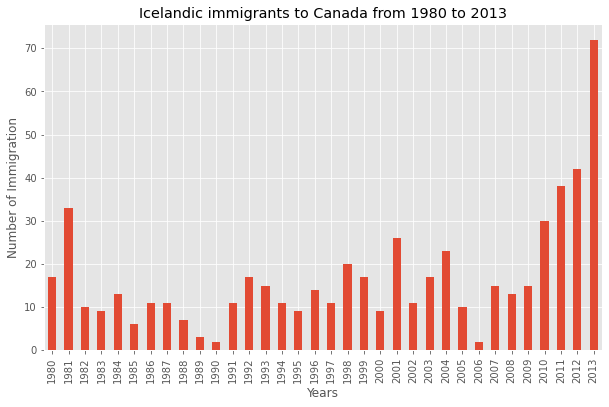

In [37]:
df_ice.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.show()

Biểu đồ cột ở trên cho thấy tổng số người nhập cư được chia nhỏ theo mỗi năm. Chúng ta có thể thấy rõ tác động của cuộc khủng hoảng tài chính, số lượng người nhập cư đến Canada bắt đầu tăng nhanh sau năm 2008.

Hãy chú thích điều này trên biểu đồ bằng phương thức `annotate` của **lớp scripting** hoặc **interface pyplot**. Chúng ta sẽ truyền các tham số sau:

-   `s`: str, văn bản trích dẫn.
-   `xy`: Tuple chỉ định điểm (x,y) để chú thích (trong trường hợp này là điểm cuối của mũi tên).
-   `xytext`: Tuple chỉ định điểm (x, y) để đặt văn bản (trong trường hợp này là điểm bắt đầu của mũi tên).
-   `xycoords`: Hệ tọa độ mà xy được cho trong - 'data' sử dụng hệ tọa độ của đối tượng được chú thích (mặc định).
-   `arrowprops`: Sử dụng dictionary các thuộc tính để vẽ mũi tên:
    -   `arrowstyle`: Chỉ định kiểu mũi tên, `'->'` là mũi tên tiêu chuẩn.
    -   `connectionstyle`: Chỉ định kiểu kết nối. `arc3` là một đường thẳng.
    -   `color`: Chỉ định màu của mũi tên.
    -   `lw`: Chỉ định chiều rộng dòng.

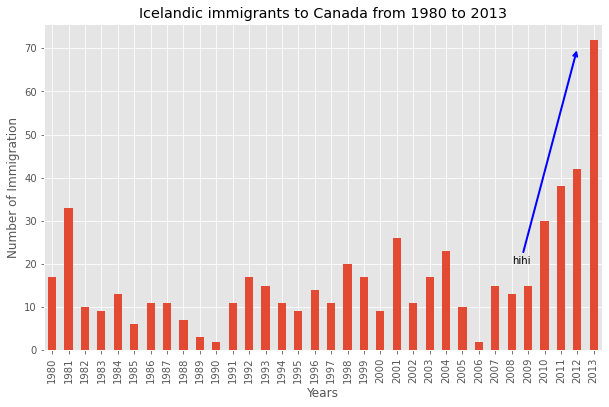

In [38]:
df_ice.plot(kind='bar', figsize=(10,6), rot=90) # quay xtick(điểm gắn nhãn trên trục x) 90 độ
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

# Chú thích mũi tên
plt.annotate('hihi',                      # s: str. sẽ để trống vì không có văn bản
             xy=(32, 70),             # đặt đầu mũi tên tại điểm (year 2012 , pop 70)
             xytext=(28, 20),         # đặt đuôi mũi tên tại điểm (year 2008 , pop 20)
             xycoords='data',         # sử dụng hệ tọa độ của điểm đang được chú thích 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


plt.show()

Cũng hãy chú thích một văn bản để đi qua mũi tên. Chúng ta sẽ truyền các tham số bổ sung sau:

-   `rotation`: góc xoay của văn bản theo độ (ngược chiều kim đồng hồ)
-   `va`: căn chỉnh theo chiều dọc của văn bản [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: căn lề ngang của văn bản [‘center’ | ‘right’ | ‘left’]


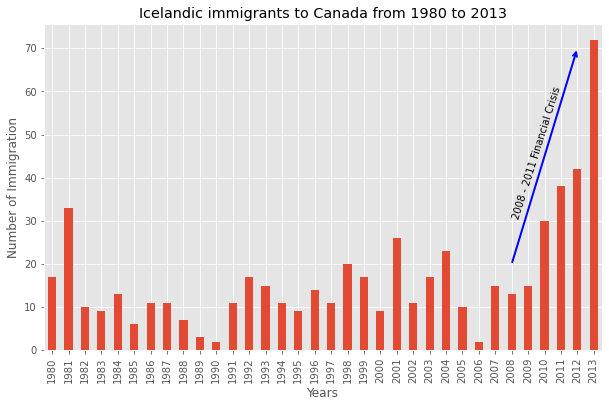

In [39]:
df_ice.plot(kind='bar', figsize=(10,6), rot=90) # quay xtick(điểm gắn nhãn trên trục x) 90 độ
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

# xoay mũi tên
plt.annotate('',                      # s: str. sẽ để trống vì không có văn bản
             xy=(32, 70),             # đặt đầu mũi tên tại điểm (year 2012 , pop 70)
             xytext=(28, 20),         # đặt đuôi mũi tên tại điểm (year 2008 , pop 20)
             xycoords='data',         # sử dụng hệ tọa độ của điểm đang được chú thích 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# xoay văn bản
plt.annotate('2008 - 2011 Financial Crisis', # văn bản hiển thị
             xy=(28, 30),                    # bắt đầu văn bản tại điểm (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # muốn căn chỉnh văn bản theo chiều dọc: 'bottom'
             ha='left',                      # muốn căn lề ngang văn bản: 'left'
            )

plt.show()

### **Biểu đồ cột ngang**

Đôi khi, việc biểu diễn dữ liệu theo chiều ngang sẽ thực tế hơn, đặc biệt nếu bạn cần thêm chỗ để gắn nhãn các cột. Trong biểu đồ cột ngang, trục y được sử dụng để ghi nhãn và chiều dài của các cột trên trục x tương ứng với độ lớn của biến được đo. Như bạn sẽ thấy, trên trục y có nhiều chỗ hơn để gắn nhãn các biến phân loại.

**Câu hỏi:** Sử dụng lớp scripting và tập dữ liệu `df_can`, tạo biểu đồ cột _ngang_ hiển thị _tổng_ số người nhập cư đến Canada từ top 15 quốc gia trong giai đoạn 1980 - 2013. Gắn nhãn mỗi quốc gia với tổng số người nhập cư.

Bước 1: Nhận dữ liệu liên quan đến top 15 quốc gia.

In [40]:
df_top = df_can.head(15)['Total'].transpose()
df_top.head()


India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

Bước 2: Vẽ biểu đồ dữ liệu:

1.  Sử dụng `kind='barh'` để tạo biểu đồ cột ngang.
2. Đảm bảo chọn kích thước phù hợp cho biểu đồ và dán nhãn cho các trục và đặt tiêu đề cho biểu đồ.
3.  Lặp qua các quốc gia và chú thích dân số nhập cư bằng cách sử dụng hàm chú thích của interface scripting.

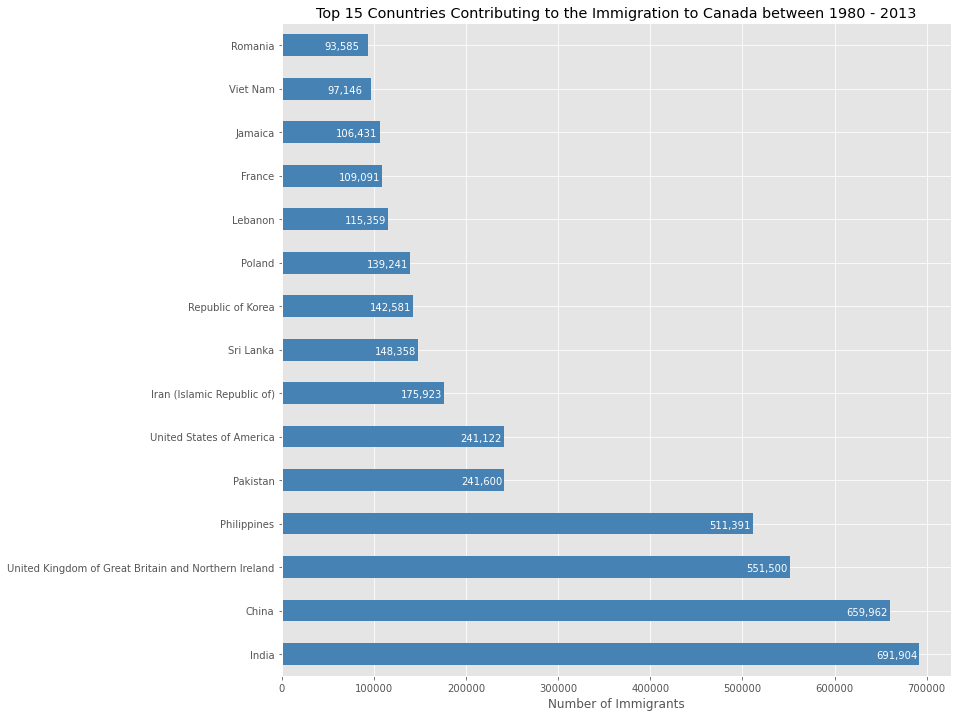

In [41]:
df_top.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# chú thích nhãn giá trị cho mỗi quốc gia
for index, value in enumerate(df_top): 
    label = format(int(value), ',') # định dạng int với dấu phẩy

    # đặt văn bản ở cuối cột (x - 47000, và y - 0.1 để khớp với cột)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()